In [1]:
import sys
import os
from pathlib import Path

# Add the project root to Python path
cwd = os.getcwd()
print(cwd)
project_root = Path(cwd).parent  # Go up to project root
# Sys.path is a list of dirs that python searches through for importing modules and files
# I'm adding the root to the path so the file can import things as if it were running from root
# This way I can keep my tests organized, but it still acts like I'm running from root
sys.path.insert(0, str(project_root))

import jsbgym
from jsbgym.control_system.power_off_evals import *
from jsbgym.control_system.power_off_pid import PowerOffControlSubsystemRawPID, PowerOffControlSubsystemDiffPID

d:\1DrvTK\OneDrive\GitHub\ADMBenchmark\control_system_evaluations


In [2]:
basic_flight_evaluator = PowerOffEval(custom_tracking_vars=[
    prp.propeller_rpm,
    prp.altitude_sl_ft
])
control_sys = PowerOffControlSubsystemDiffPID()
basic_flight_evaluator.batch_test(
    [110, 90],
    [120, 85, 75, 65, 55],
    [HdgCase.HDG_HOLD],
    control_sys,
    1,
    aircraft=jsbgym.c172x,
)

=== CASE DES AIRSPEED: 120 HEADING: HdgCase.HDG_HOLD INIT AIRSPEED: 110 ===
--> EXAMPLE 0
Running simulation for 450.0 steps
Engines set to running!
Average steady state error:1.2751157404912732
Time to first conatact: 3.2
=== CASE DES AIRSPEED: 120 HEADING: HdgCase.HDG_HOLD INIT AIRSPEED: 90 ===
--> EXAMPLE 0
Running simulation for 450.0 steps
Engines set to running!
Average steady state error:3.4977806735498755
Time to first conatact: 14.2
=== CASE DES AIRSPEED: 85 HEADING: HdgCase.HDG_HOLD INIT AIRSPEED: 110 ===
--> EXAMPLE 0
Running simulation for 450.0 steps
Engines set to running!
Average steady state error:2.977720284074444
Time to first conatact: 12.0
=== CASE DES AIRSPEED: 85 HEADING: HdgCase.HDG_HOLD INIT AIRSPEED: 90 ===
--> EXAMPLE 0
Running simulation for 450.0 steps
Engines set to running!
Average steady state error:1.3258183326475415
Time to first conatact: 0.2
=== CASE DES AIRSPEED: 75 HEADING: HdgCase.HDG_HOLD INIT AIRSPEED: 110 ===
--> EXAMPLE 0
Running simulation for

In [3]:
# Get batch evaluations
print(basic_flight_evaluator.create_batch_eval(list(range(len(basic_flight_evaluator.cases)))))

{'max kias overshoot': 1.909022854012349, 'max kias steady state error': 10.796114152911192, 'avg kias steady state error': 4.147973519376982, 'avg max kias overshoot': 1.034300373803974, 'avg hdg steady state error': 0.5686358483984097, 'max hdg overshoot': 0, 'avg time fufillment': 0.0, 'mean abs alt steady state error': 2.2328409887300475}


In [4]:
indxs, criteria = basic_flight_evaluator.sort_evals()

In [5]:
print(indxs)
print(f"number of evals done: {len(indxs)}")
# Sanity check that it is sorted on the criteria correctly
print("Stall/Overspeed, SS kias error, max kias overshoot, exceeded expected time to first contact, max load factor")
for idx, c in enumerate(criteria):
    case_type = basic_flight_evaluator.cases[indxs[idx]]
    print(f"{case_type} : {c} : index {indxs[idx]}")


[8, 6, 4, 9, 2, 1, 7, 5, 3, 0]
number of evals done: 10
Stall/Overspeed, SS kias error, max kias overshoot, exceeded expected time to first contact, max load factor
(110, 55, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 11, 0, 1, 1.6) : index 8
(110, 65, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 7, 0, 1, 1.6) : index 6
(110, 75, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 5, 2, 1, 1.6) : index 4
(90, 55, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 5, 0, 1, 1.4000000000000001) : index 9
(110, 85, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 3, 2, 1, 1.6) : index 2
(90, 120, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 3, 1, 1, 1.2000000000000002) : index 1
(90, 65, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 3, 0, 1, 1.4000000000000001) : index 7
(90, 75, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 2, 2, 0, 1.4000000000000001) : index 5
(90, 85, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 1, 2, 0, 1.1) : index 3
(110, 120, <HdgCase.HDG_HOLD: 'hold heading'>) : (0, 1, 1, 0, 1.3) : index 0


{'ic/vw-dir-deg': 0, 'ic/vw-mag-fps': 0, 'ic/h-sl-ft': 5000, 'ic/psi-true-deg': 0, 'ic/vc-kts': 90, 'altitude change desired': -25, 'heading change desired': 0}
('max kias overshoot', 0.0075594321093745975)
('max hdg overshoot', 0)
('max load factor', 1.380488348425876)
('avg load factor', 0.9951340723952371)
('min airspeed', 64.99244056789063)
('max airspeed', 89.98774837231346)
('avg airspeed', 67.7082343793697)
('avg kias steady state error', 2.653425225547216)
('avg hdg steady state error', 0.5158106806217253)
('time to first contact s', 14.2)
('max man time mins', 0.0)
('max time mins', 1.5)


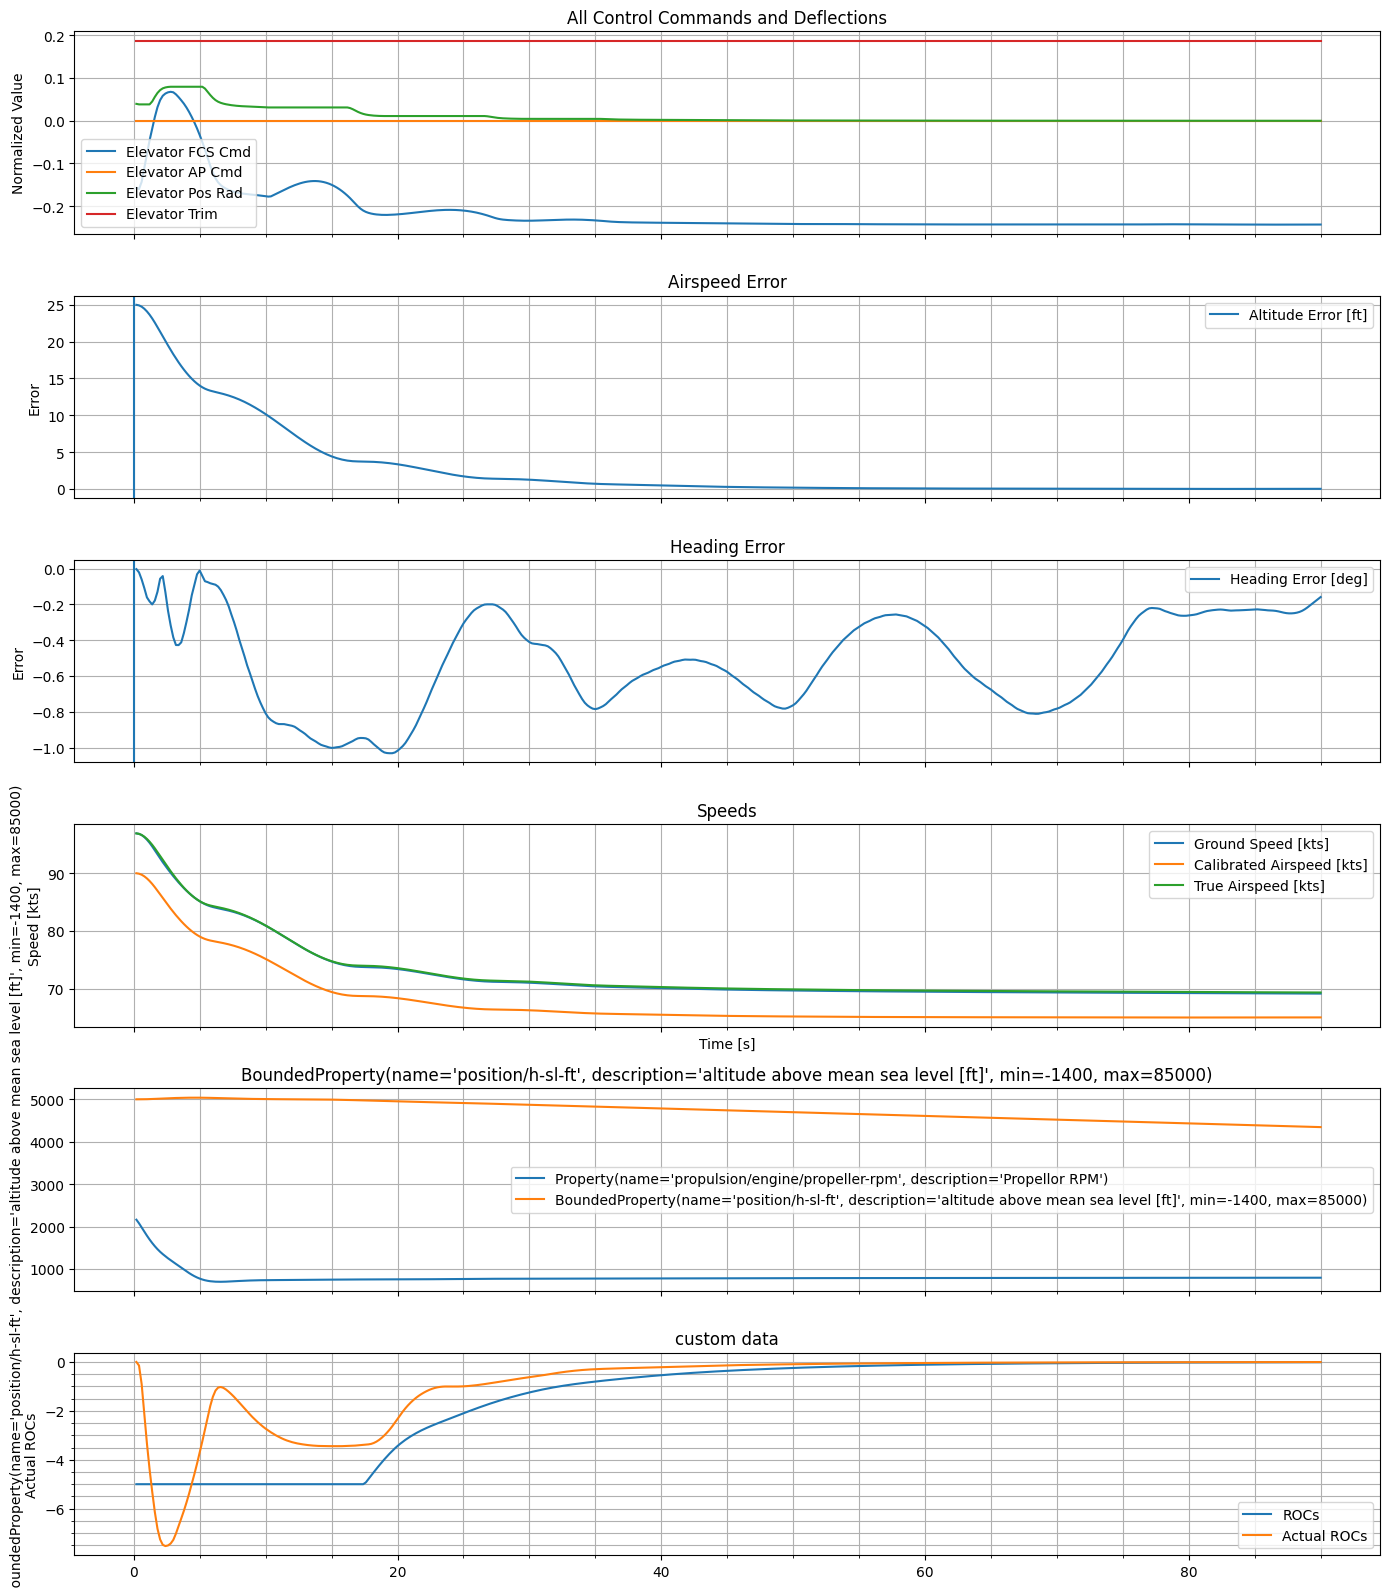

In [7]:
# Get the trajectory data and precise evaluation for an individual index for analysis
selected_index = 7
print(basic_flight_evaluator.initial_conditions[selected_index])
eval = basic_flight_evaluator.evals[selected_index]
[print(i) for i in eval.items()]
basic_flight_evaluator.plot_eval(selected_index, control_sys.get_data())

In [ ]:
# Run a single simulation from initial conditions
basic_flight_evaluator.run_single_eval([110], [65], HdgCase.HDG_HOLD, control_sys, aircraft=jsbgym.c172x, render_mode="flightgear")